In [1]:
import pandas as pd

data = pd.read_csv('datasets/vm_power_dataset.csv')
data.head()

,_time,vm_id,cpuload,disk_free,disk_total,disk_used,disk_used_percentage,mem_free,mem_total,mem_used,...,scaph_process_cpu_usage_percentage,scaph_process_disk_read_bytes,scaph_process_disk_total_read_bytes,scaph_process_disk_total_write_bytes,scaph_process_disk_write_bytes,scaph_process_memory_bytes,scaph_process_memory_virtual_bytes,scaph_process_power_consumption_microwatts,uptime_hours,vm_power_watts
0,2025-08-04 06:00:00+00:00,185,0.013112,3.435974e+10,3.435974e+10,0.0,0.0,278159360.0,2.147484e+09,1.869324e+09,...,0.059718,0.0,1.470603e+10,1.084054e+11,12288.0,2.157105e+09,7.449223e+09,52989.676174,1793.878889,0.052990
1,2025-08-04 06:00:00+00:00,306,0.013463,3.435974e+10,3.435974e+10,0.0,0.0,355667968.0,2.147484e+09,1.791816e+09,...,0.071093,0.0,2.705371e+09,2.744689e+10,0.0,2.143072e+09,7.446151e+09,63082.947669,635.190833,0.063083
2,2025-08-04 06:02:00+00:00,185,0.009324,3.435974e+10,3.435974e+10,0.0,0.0,277344256.0,2.147484e+09,1.870139e+09,...,0.065471,0.0,1.470603e+10,1.084069e+11,0.0,2.157105e+09,7.449223e+09,50371.403282,1793.898889,0.050371
3,2025-08-04 06:02:00+00:00,306,0.000000,3.435974e+10,3.435974e+10,0.0,0.0,355409920.0,2.147484e+09,1.792074e+09,...,0.079704,0.0,2.705371e+09,2.744713e+10,0.0,2.143072e+09,7.446151e+09,61321.703358,635.210833,0.061322
4,2025-08-04 06:03:00+00:00,185,0.011483,3.435974e+10,3.435974e+10,0.0,0.0,275492864.0,2.147484e+09,1.871991e+09,...,0.065622,0.0,1.470603e+10,1.084077e+11,45056.0,2.157105e+09,7.440830e+09,52243.178539,1793.915278,0.052243


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

target = 'vm_power_watts'
features = [
    'cpuload', 'mem_used_percentage', 'swap_used_percentage',
    'disk_used_percentage', 'uptime_hours',
    'scaph_process_cpu_usage_percentage',
    'scaph_process_memory_bytes', 'scaph_process_memory_virtual_bytes',
    'scaph_process_disk_total_read_bytes', 'scaph_process_disk_total_write_bytes'
]

# Drop rows with missing values
df = data.dropna(subset=features + [target])

X = df[features]
y = df[target]

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [4]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f} Watts")

R² Score: 0.9978
Mean Absolute Error: 0.0383 Watts


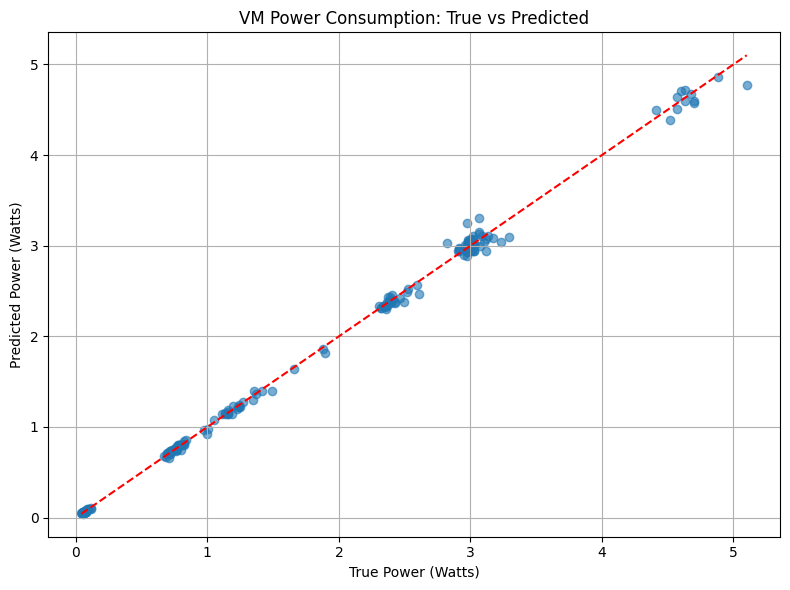

In [6]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Power (Watts)')
plt.ylabel('Predicted Power (Watts)')
plt.title('VM Power Consumption: True vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

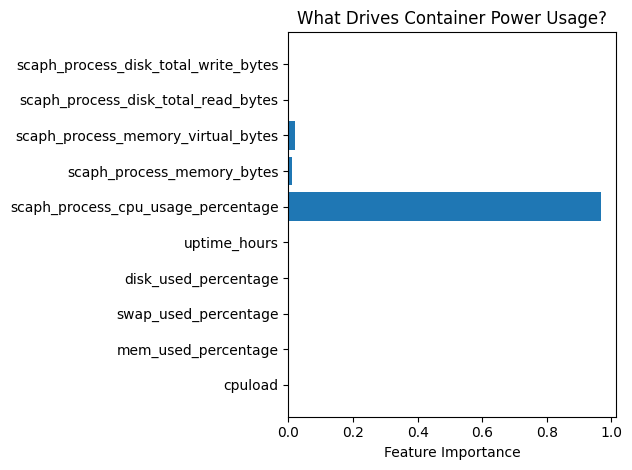

In [7]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("What Drives Container Power Usage?")
plt.tight_layout()
plt.show()